In [1]:
%matplotlib inline

In [2]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# Modified for project porpuses by: Cristian Gonzalez-Colin
# License: BSD 3 clause
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA, FastICA, KernelPCA, TruncatedSVD, DictionaryLearning, FactorAnalysis, NMF
from imblearn.over_sampling import SMOTE, ADASYN, SVMSMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, AllKNN, EditedNearestNeighbours, RepeatedEditedNearestNeighbours


In [11]:
def cross_validation(model, _X, _y, _cv=5):
      '''Function to perform 5 Folds Cross-Validation
       Parameters
       ----------
      model: Python Class, default=None
              This is the machine learning algorithm to be used for training.
      _X: array
           This is the matrix of features.
      _y: array
           This is the target variable.
      _cv: int, default=5
          Determines the number of folds for cross-validation.
       Returns
       -------
       The function returns a dictionary containing the metrics 'accuracy', 'precision',
       'recall', 'f1' for both training set and validation set.
      '''
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      return {"Mean Training Accuracy": results['train_accuracy'].mean(),
              "Mean Training Precision": results['train_precision'].mean(),
              "Mean Training Recall": results['train_recall'].mean(),
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Mean Validation Accuracy": results['test_accuracy'].mean(),
              "Mean Validation Precision": results['test_precision'].mean(),
              "Mean Validation Recall": results['test_recall'].mean(),
              "Mean Validation F1 Score": results['test_f1'].mean()
              }
     #  return {"Training Accuracy scores": results['train_accuracy'],
     #          "Mean Training Accuracy": results['train_accuracy'].mean(),
     #          "Training Precision scores": results['train_precision'],
     #          "Mean Training Precision": results['train_precision'].mean(),
     #          "Training Recall scores": results['train_recall'],
     #          "Mean Training Recall": results['train_recall'].mean(),
     #          "Training F1 scores": results['train_f1'],
     #          "Mean Training F1 Score": results['train_f1'].mean(),
     #          "Validation Accuracy scores": results['test_accuracy'],
     #          "Mean Validation Accuracy": results['test_accuracy'].mean(),
     #          "Validation Precision scores": results['test_precision'],
     #          "Mean Validation Precision": results['test_precision'].mean(),
     #          "Validation Recall scores": results['test_recall'],
     #          "Mean Validation Recall": results['test_recall'].mean(),
     #          "Validation F1 scores": results['test_f1'],
     #          "Mean Validation F1 Score": results['test_f1'].mean()
     #          }

In [12]:
tpm_cancer = pd.read_table("data/inputfiles/GSE131512_cancerTPM.txt")
metadata = pd.read_table("data/inputfiles/GSE131512_metaData.csv", sep=",", index_col=0)
metadata = metadata[metadata["recurStatus"].notna()]
metadata = metadata.replace({"recurStatus":  {"R":-1,"N":1}})

genes = pd.read_table('DEgenes_recurrent.txt', header=None)[0].values
genes = list(genes)
####
tpm_cancer = tpm_cancer.transpose()
tpm = tpm_cancer
tpm = pd.merge(tpm, metadata.iloc[:,:-1], left_index=True, right_index=True, how='outer')


In [13]:
tpm['cancertype'] = tpm['cancertype'].factorize()[0]
tpm['Gender'] = tpm['Gender'].factorize()[0]
tpm['chemo'] = tpm['chemo'].factorize()[0]


Nearest Neighbors
Linear SVM
RBF SVM
Poly SVM
Gaussian Process
Decision Tree
Random Forest
Neural Net
AdaBoost
Naive Bayes
QDA
Nearest Neighbors
Linear SVM


/Users/cgonzalez/miniconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/cgonzalez/miniconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/cgonzalez/miniconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/cgonzalez/miniconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/cgonzalez/miniconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/cgonzalez/miniconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear

RBF SVM
Poly SVM
Gaussian Process
Decision Tree
Random Forest
Neural Net
AdaBoost
Naive Bayes
QDA
Nearest Neighbors
Linear SVM


/Users/cgonzalez/miniconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/cgonzalez/miniconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/cgonzalez/miniconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/cgonzalez/miniconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/cgonzalez/miniconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/cgonzalez/miniconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear

RBF SVM
Poly SVM
Gaussian Process
Decision Tree
Random Forest
Neural Net
AdaBoost
Naive Bayes
QDA
Nearest Neighbors
Linear SVM
RBF SVM
Poly SVM
Gaussian Process
Decision Tree
Random Forest
Neural Net
AdaBoost
Naive Bayes
QDA
Nearest Neighbors
Linear SVM
RBF SVM
Poly SVM
Gaussian Process
Decision Tree
Random Forest
Neural Net
AdaBoost
Naive Bayes
QDA
Nearest Neighbors
Linear SVM
RBF SVM
Poly SVM
Gaussian Process
Decision Tree
Random Forest
Neural Net
AdaBoost
Naive Bayes
QDA
Nearest Neighbors
Linear SVM
RBF SVM
Poly SVM
Gaussian Process


/Users/cgonzalez/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree
Random Forest
Neural Net
AdaBoost
Naive Bayes
QDA


/Users/cgonzalez/miniconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/cgonzalez/miniconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/cgonzalez/miniconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/cgonzalez/miniconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/cgonzalez/miniconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/cgonzalez/miniconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear

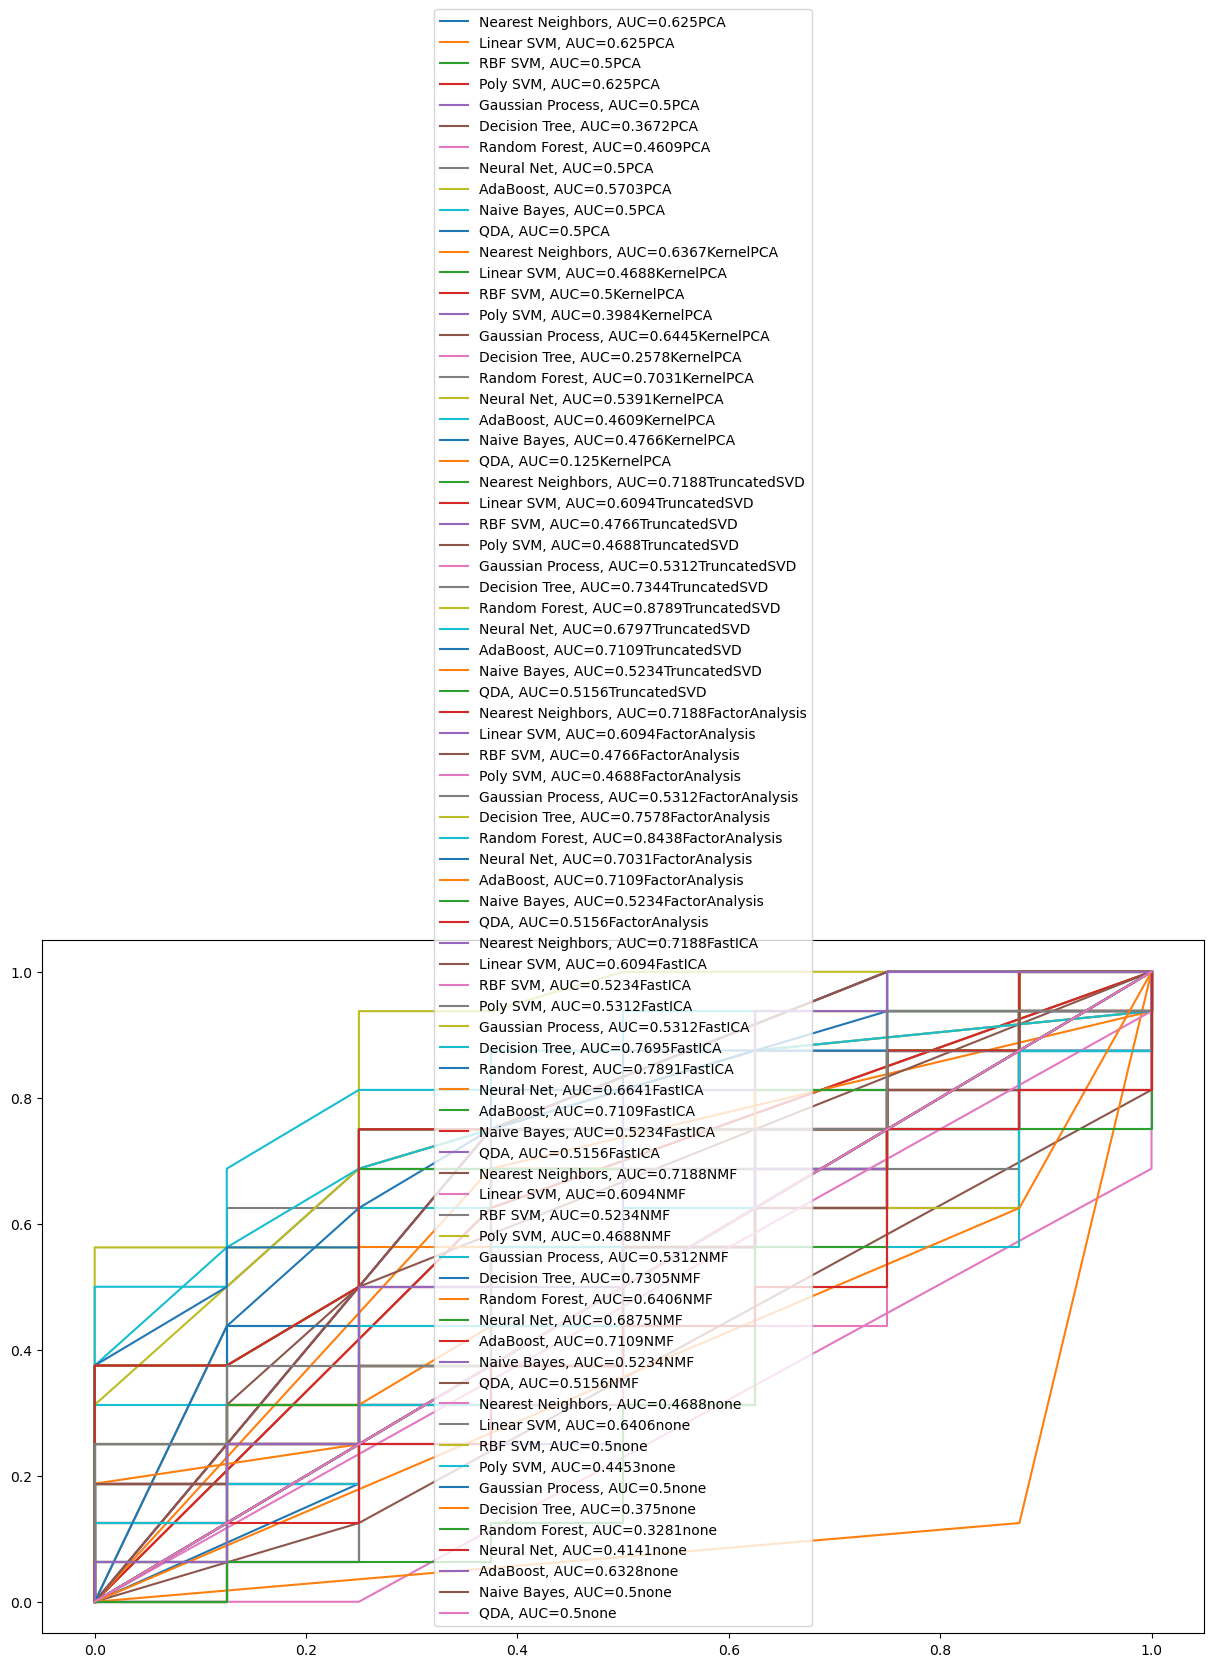

In [44]:

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Poly SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025,probability=True),
    SVC(gamma=2, C=1, probability=True),
    SVC(kernel="poly", probability=True),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000, learning_rate='adaptive'),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

names_reduction = [
    "PCA",
    "KernelPCA",
    "TruncatedSVD",
    "FactorAnalysis",
    "FastICA",
    "NMF",
    "none"
]
    

features = genes
X = tpm[features ]#+ list(metadata.iloc[:,:-1].columns.values)]
y = metadata['recurStatus'].values

figure = plt.figure(figsize=(15, 9))
i = 1

# preprocess dataset, split into training and test part
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

##oversampling undersampling
# X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)
# X_resampled, y_resampled = ADASYN().fit_resample(X_train, y_train)
# X_resampled, y_resampled = SVMSMOTE(random_state=42).fit_resample(X_train, y_train)
# X_resampled, y_resampled = RandomOverSampler(random_state=0).fit_resample(X_train, y_train)

###undersampling
# X_resampled, y_resampled = RandomUnderSampler(random_state=0).fit_resample(X_train, y_train)
# X_resampled, y_resampled = AllKNN().fit_resample(X_train, y_train)
# X_resampled, y_resampled = EditedNearestNeighbours().fit_resample(X_train, y_train)
# X_resampled, y_resampled = RepeatedEditedNearestNeighbours().fit_resample(X_train, y_train)


# ##no resampling
# X_resampled = X_train
y_resampled = y_train
# save


i += 1
# iterate over classifiers
dataframes = []
for reduc in names_reduction:
    metrics = {}
    if reduc == "none":
        X_resampled = X_train
        X_test_tr = X_test
    else:
        # #### feature selection
        if reduc == "PCA":
            red = PCA().fit(X_train)
        elif reduc == "KernelPCA":
            red = KernelPCA().fit(X_train)
        elif reduc == "TruncatedSVD":
            red = TruncatedSVD().fit(X_train)
        elif reduc == "":
            red = FactorAnalysis().fit(X_train)
        elif reduc == "":
            red = NMF().fit(X_train)

        X_resampled = red.transform(X_train)
        X_test_tr = red.transform(X_test)

        red_name = reduc + ".pkl"
        joblib.dump(red, "results/reduction/" + red_name)

    for name, clf in zip(names, classifiers):
        print(name)
        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_resampled, y_resampled)
        results = cross_validation(clf, X_resampled, y_resampled, 5)
        #score = clf.score(X_test, y_test)
        results['Dimensionality Reduction'] = reduc
        
        metrics[name] = results
        y_pred = clf.predict_proba(X_test_tr)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        auc = round(roc_auc_score(y_test, y_pred), 4)
        plt.plot(fpr,tpr,label=name + ", AUC="+str(auc) + reduc)
        model_name = name.replace(" ", "_") + "_" + reduc + ".pkl"
        joblib.dump(clf, "results/models/" + model_name) 

        plt.legend()

    df = pd.DataFrame.from_dict(metrics, orient='columns')
    df = df.transpose()
    dataframes.append(df)

metrics = pd.concat(dataframes)

In [45]:
metrics

,Mean Training Accuracy,Mean Training Precision,Mean Training Recall,Mean Training F1 Score,Mean Validation Accuracy,Mean Validation Precision,Mean Validation Recall,Mean Validation F1 Score,Dimensionality Reduction
Nearest Neighbors,0.965215,1.0,0.9518,0.974728,0.6,0.722655,0.72,0.705546,PCA
Linear SVM,1.0,1.0,1.0,1.0,0.693333,0.720293,0.941818,0.815608,PCA
RBF SVM,1.0,1.0,1.0,1.0,0.721905,0.721905,1.0,0.838462,PCA
Poly SVM,1.0,1.0,1.0,1.0,0.707619,0.717509,0.98,0.828317,PCA
Gaussian Process,1.0,1.0,1.0,1.0,0.680952,0.709304,0.943636,0.809086,PCA
...,...,...,...,...,...,...,...,...,...
Random Forest,0.889171,0.87043,1.0,0.929843,0.706667,0.732381,0.941818,0.821932,none
Neural Net,1.0,1.0,1.0,1.0,0.68381,0.747403,0.850909,0.793318,none
AdaBoost,1.0,1.0,1.0,1.0,0.613333,0.705584,0.792727,0.74303,none
Naive Bayes,0.996552,1.0,0.995238,0.99759,0.707619,0.717509,0.98,0.828317,none


In [48]:
metrics.to_csv("results/metrics_recurrentvvsnonrecurrent.csv")